In [33]:
import pandas as pd
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Detect encoding
with open('IMDb-Movies-India.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Load the dataset with detected encoding
data = pd.read_csv('IMDb-Movies-India.csv', encoding=encoding)

# Data Cleaning and Processing
def clean_year(year_str):
    if isinstance(year_str, str):
        try:
            return int(''.join(filter(str.isdigit, year_str)))
        except ValueError:
            return None
    return None

data['Year'] = data['Year'].apply(clean_year)
data = data.dropna(subset=['Year'])

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data = data.dropna(subset=['Rating'])

le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()
le_actor2 = LabelEncoder()
le_actor3 = LabelEncoder()

data['Genre'] = le_genre.fit_transform(data['Genre'].astype(str))
data['Director'] = le_director.fit_transform(data['Director'].astype(str))
data['Actor 1'] = le_actor1.fit_transform(data['Actor 1'].astype(str))
data['Actor 2'] = le_actor2.fit_transform(data['Actor 2'].astype(str))
data['Actor 3'] = le_actor3.fit_transform(data['Actor 3'].astype(str))

def convert_duration(duration):
    if isinstance(duration, str) and 'min' in duration:
        try:
            return int(duration.split(' ')[0])
        except ValueError:
            return None
    return None

data['Duration'] = data['Duration'].apply(convert_duration)

features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize and train the model
model = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 Score: {np.mean(cv_scores) * 100:.2f}%")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print accuracy metrics
accuracy_percentage = r2 * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Cross-validated R^2 Score: 4.76%
Model Accuracy: 6.90%
Mean Squared Error (MSE): 1.73
Mean Absolute Error (MAE): 1.05


In [28]:
# Detect encoding
with open('IMDb-Movies-India.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Load the dataset with detected encoding
data = pd.read_csv('IMDb-Movies-India.csv', encoding=encoding)

# Data Cleaning and Processing
def clean_year(year_str):
    if isinstance(year_str, str):
        try:
            return int(''.join(filter(str.isdigit, year_str)))
        except ValueError:
            return None
    return None

In [29]:
data['Year'] = data['Year'].apply(clean_year)
data = data.dropna(subset=['Year'])

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data = data.dropna(subset=['Rating'])

le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()
le_actor2 = LabelEncoder()
le_actor3 = LabelEncoder()

data['Genre'] = le_genre.fit_transform(data['Genre'].astype(str))
data['Director'] = le_director.fit_transform(data['Director'].astype(str))
data['Actor 1'] = le_actor1.fit_transform(data['Actor 1'].astype(str))
data['Actor 2'] = le_actor2.fit_transform(data['Actor 2'].astype(str))
data['Actor 3'] = le_actor3.fit_transform(data['Actor 3'].astype(str))

def convert_duration(duration):
    if isinstance(duration, str) and 'min' in duration:
        try:
            return int(duration.split(' ')[0])
        except ValueError:
            return None
    return None

data['Duration'] = data['Duration'].apply(convert_duration)

features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1.7309453256557308
R^2 Score: 0.06895632416439457
Mean Absolute Error: 1.0498595167068505


In [31]:
r2 = r2_score(y_test, y_pred)

# Print accuracy as percentage
accuracy_percentage = r2 * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 6.90%


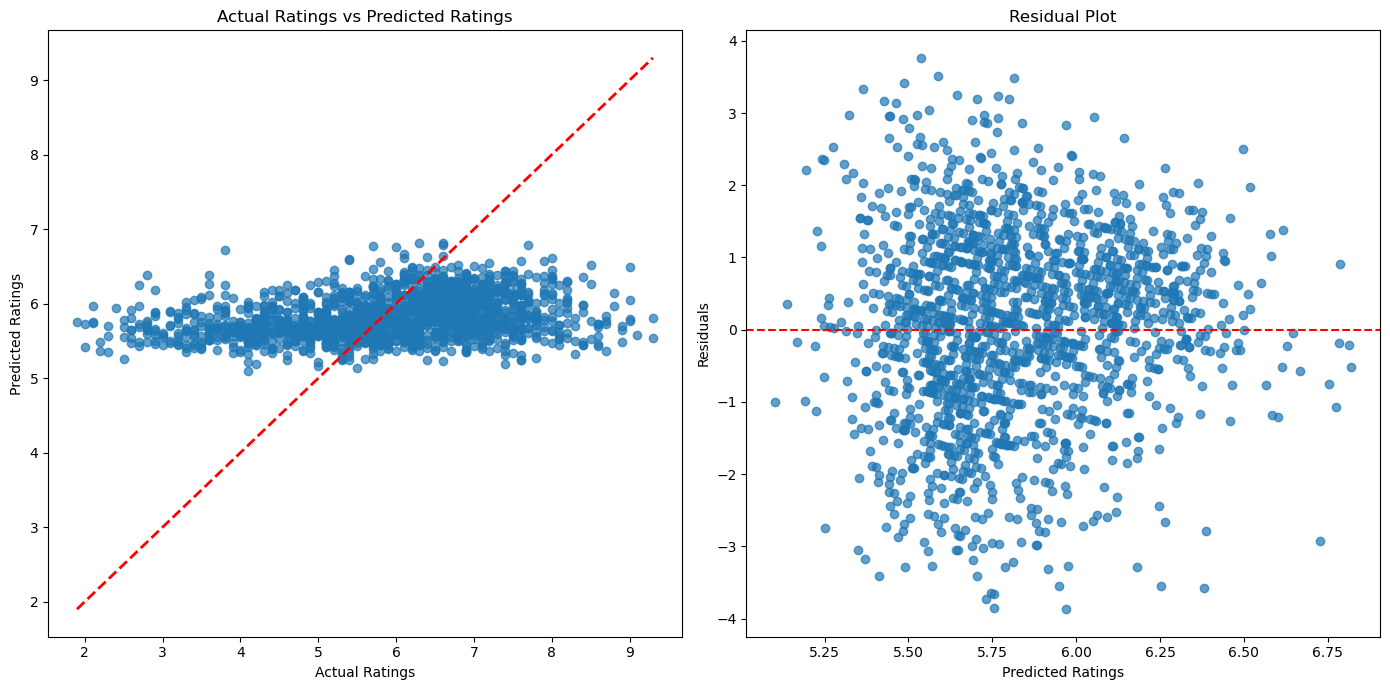

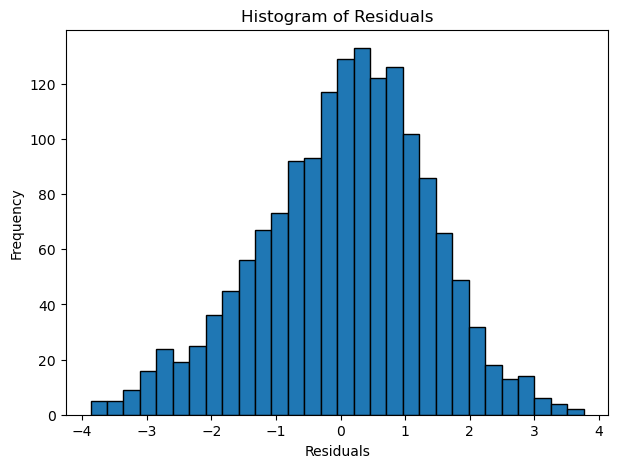

In [30]:

# Improved Plot: Prediction vs Actual
plt.figure(figsize=(14, 7))

# Scatter plot with a line of perfect prediction
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual Ratings vs Predicted Ratings')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()